# Importación de librerías

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import itertools
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.set()

# 1. Forecast de ventas de vino

### 1.1 Exploración de datos

In [3]:
data = pd.read_csv('/home/ignacio/github/labIC/lab1/AustralianWines.csv')

In [4]:
data.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,Jan-80,2585,464,112,1686,85,1954
1,Feb-80,3368,675,118,1591,89,2302
2,Mar-80,3210,703,129,2304,109,3054
3,Apr-80,3111,887,99,1712,95,2414
4,May-80,3756,1139,116,1471,91,2226


In [5]:
data.dtypes

Month          object
Fortified       int64
Red             int64
Rose           object
sparkling       int64
Sweet white     int64
Dry white       int64
dtype: object

**Observamos que la columna Rose, no es de tipo entero**

In [6]:
data['Rose ']

0      112
1      118
2      129
3       99
4      116
      ... 
175      *
176     46
177     51
178     63
179     84
Name: Rose , Length: 180, dtype: object

**Se intentará encontrar las filas que contengan valores erróneos.**

In [7]:
notInt = {}
for i, value in enumerate(data['Rose ']):
    try:
        int(value)
    except:
        notInt[i] = value
print('Filas que no contienen valores enteros y su respectivo valor: ' , notInt)

Filas que no contienen valores enteros y su respectivo valor:  {174: '*', 175: '*'}


In [8]:
data[170:180]

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
170,Mar-94,1965,2201,42,1720,187,3754
171,Apr-94,2659,2455,48,1725,279,3708
172,May-94,2354,2204,44,1674,193,3210
173,Jun-94,2592,2660,45,1693,227,3517
174,Jul-94,2714,3670,*,2031,225,3905
175,Aug-94,2294,2665,*,1495,205,3670
176,Sep-94,2416,2639,46,2968,259,4221
177,Oct-94,2016,2226,51,3385,254,4404
178,Nov-94,2799,2586,63,3729,275,5086
179,Dec-94,2467,2684,84,5999,394,5725


**Por ahora solo reemplazaremos estos valores por cero (evaluar si se eliminan las filas, o reemplazamos por promedio)**

In [9]:
data['Rose '][174] = 0
data['Rose '][175] = 0
data['Rose '] = data['Rose '].astype(int)

<ipython-input-9-91e622e93bc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rose '][174] = 0
<ipython-input-9-91e622e93bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rose '][175] = 0


In [11]:
data['Año'] = pd.DataFrame(1980 + np.linspace(0,15, 12*15))

<Figure size 1440x720 with 0 Axes>

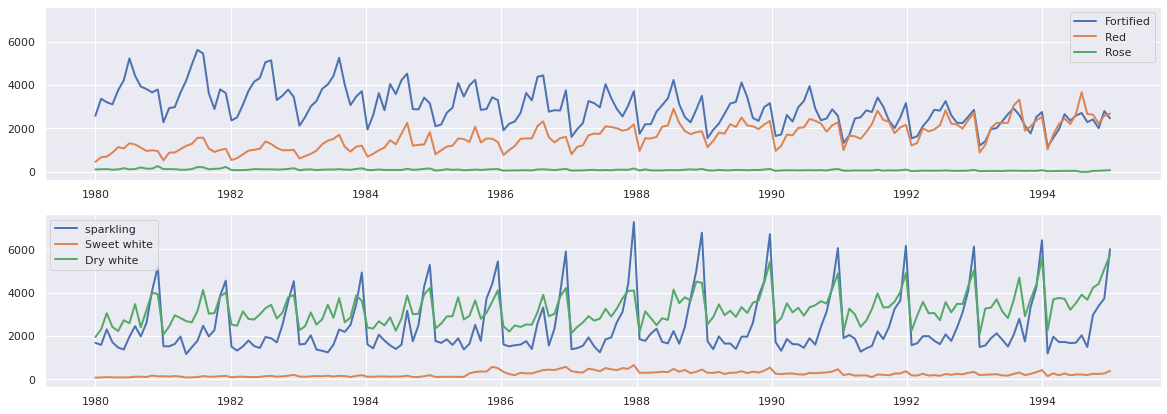

In [23]:
plt.figure(figsize= (20,10))
f, axes = plt.subplots(2, 1, sharey=True, figsize = (20,7), )

for col in data.columns[1:4]:
    axes[0].plot(data['Año'], data[col], label = col, linewidth = 2)
for col in data.columns[4:-1]:  
    axes[1].plot(data['Año'], data[col], label = col, linewidth = 2)
axes[0].legend()
axes[1].legend()

### 1.2 Seasonal descompose


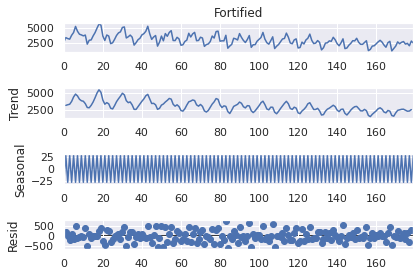

In [26]:
decomposition = sm.tsa.seasonal_decompose(data['Fortified'], model='additive', period = 2)
fig = decomposition.plot()
plt.show()

### 1.3 Arimax


# 2. Diseño de Experimentos (DoE) para mejorar los costos de producción de una empresa de manufactura que utiliza fibra sintética

### 2.1 Datos 

### 2.2 ANOVA

### 2.3 [OPCIONAL] Prueba de comparaciones múltiples